# Define the system  

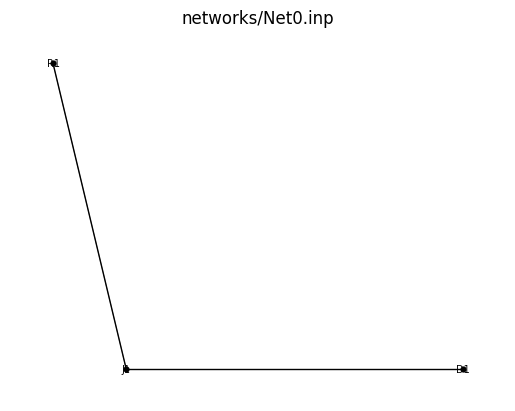

<Axes: title={'center': 'networks/Net0.inp'}>

In [2]:
import wntr
import wntr_quantum

# Create a water network model
inp_file = 'networks/Net0.inp'
# inp_file = 'networks/Net2Loops.inp'
wn = wntr.network.WaterNetworkModel(inp_file)

# Graph the network
wntr.graphics.plot_network(wn, title=wn.name, node_labels=True)


## Run with the original simulator

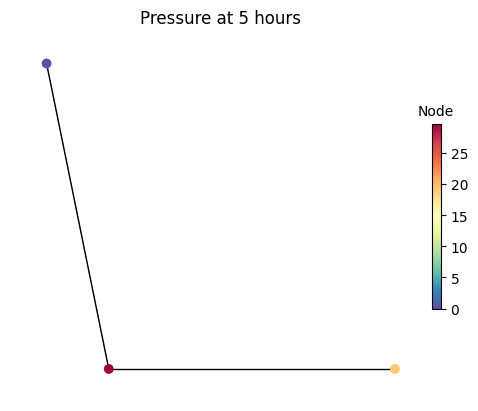

<Axes: title={'center': 'Pressure at 5 hours'}>

In [5]:
# define the classical simulator
sim = wntr.sim.EpanetSimulator(wn)

# run the simulation
results = sim.run_sim()

# Plot results on the network
pressure_at_5hr_ref = results.node['pressure'].loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr_ref, node_size=50,
                        title='Pressure at 5 hours', node_labels=False)

## Run with the QUBOLS solver

/home/nico/QuantumApplicationLab/vitens/wntr-quantum/wntr_quantum/epanet/Linux/libepanet22_amd64.so
Solving the linear system Ax = b with:
A =  [[ 0.1155474 -0.1155474]
 [-0.1155474  2.454284 ]]
b =  [ -1.614401 230.2773  ]
x =  [80.88954057 97.50733138]
residue =  0.4376843814840416
Solving the linear system Ax = b with:
A =  [[ 0.02344142 -0.02344142]
 [-0.02344142  0.6409284 ]]
b =  [-0.7850911 60.92185  ]
x =  [69.15933529 97.75171065]
residue =  0.15820189599283918
Solving the linear system Ax = b with:
A =  [[ 0.02888291 -0.02888291]
 [-0.02888291  0.9473562 ]]
b =  [-0.9894381 90.34328  ]
x =  [62.31671554 97.2629521 ]
residue =  0.01991736905587443
Solving the linear system Ax = b with:
A =  [[ 0.02687917 -0.02687917]
 [-0.02687917  0.8311499 ]]
b =  [-0.9240913 79.15507  ]
x =  [62.31671554 97.2629521 ]
residue =  0.018224089811839452
Solving the linear system Ax = b with:
A =  [[ 0.02694396 -0.02694396]
 [-0.02694396  0.8374696 ]]
b =  [-0.9263611 79.76565  ]
x =  [58.4066471

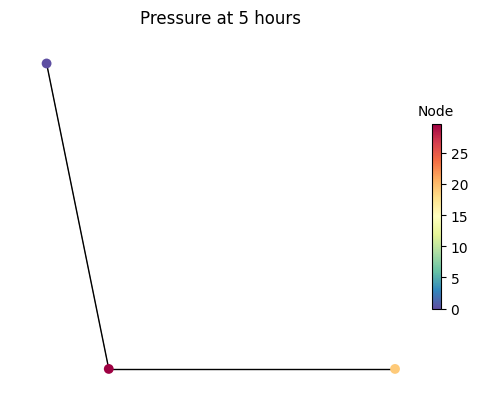

<Axes: title={'center': 'Pressure at 5 hours'}>

In [4]:
from quantum_newton_raphson.qubo_solver import QUBO_SOLVER

# define the solver
linear_solver = QUBO_SOLVER(
    num_qbits=11,
    num_reads=250,
    range=250,
    offset=0,
    # iterations=5, # only valid for aequbols
    # temperature=1e4, # only valid for AEqubols
    use_aequbols=False,
)

# define the quantum epanet simulator
sim = wntr_quantum.sim.QuantumEpanetSimulator(wn, linear_solver=linear_solver)

# run the simulation
results = sim.run_sim(linear_solver=linear_solver)

# Plot results on the network
pressure_at_5hr = results.node['pressure'].loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=50,
                        title='Pressure at 5 hours', node_labels=False)

## Compare the pressure values obtained

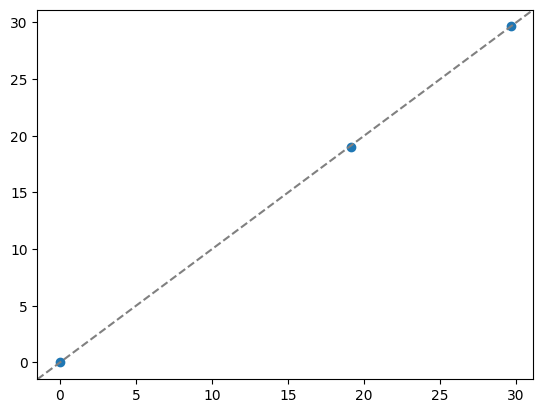

In [8]:
import matplotlib.pyplot as plt 
plt.scatter(pressure_at_5hr_ref.values, pressure_at_5hr.values)
plt.axline((0, 0), slope=1, linestyle="--", color="gray")
plt.show()